## Insurance Claim Prediction



Predict whether the policyholder will file a claim in the next 6 months or not.





## Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the **highest claim settlement ratio**. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months**. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

# Load libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [6]:
train = pd.read_csv(r"D:\case_studies(eda)\Insurance_claim_prediction\train_qWM28Yl.csv")
display(train.head())
train.shape

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


(58592, 44)

In [7]:
test = pd.read_csv(r"D:\case_studies(eda)\Insurance_claim_prediction\test_zo1G9sv.csv")
display(test.head())
test.shape

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


(39063, 43)

In [9]:
submission = pd.read_csv(r"D:\case_studies(eda)\Insurance_claim_prediction\sample_submission_KvRh9Sx.csv")
display(submission.head())
submission.shape


,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


(39063, 2)

In [10]:
# To see max. columns:-

pd.set_option('display.max_columns', 50)
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


# Combining train and test dataset

In [11]:
#Lets combine the data
combined = pd.concat([train, test], ignore_index = True)

In [66]:
# Checking shape 
train.shape , test.shape, combined.shape

((58592, 44), (39063, 43), (97655, 53))

In [13]:
# Checking variable type :-

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [14]:
# Seperating numerical and categorical columns :-

num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(include = 'object').columns

In [15]:
# Checking no. of columns in numerical and categorical :-

len(num_cols), len(cat_cols)

(16, 28)

## Univariate Analysis

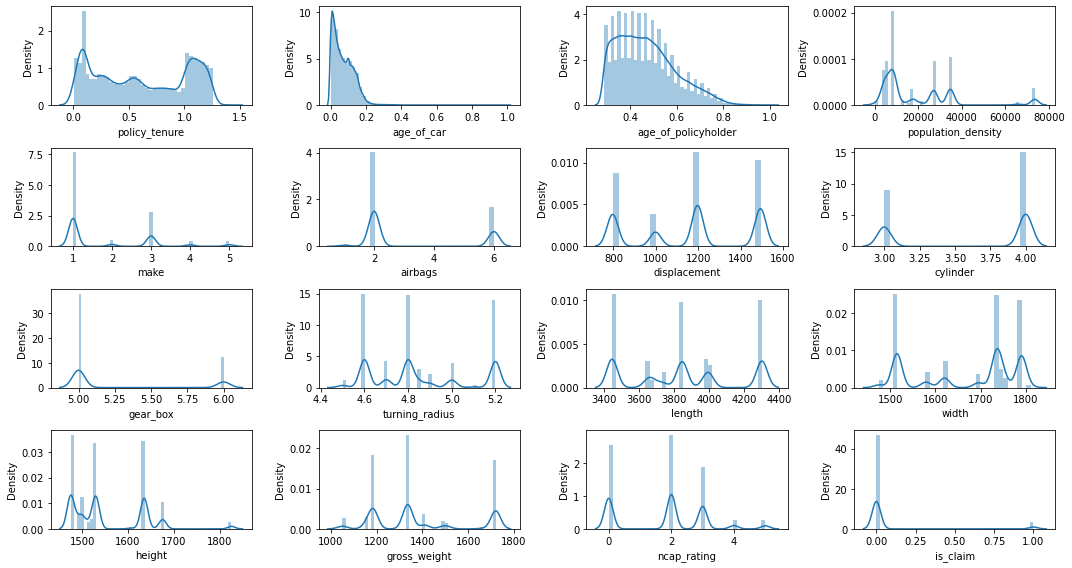

In [16]:
#Ploting all the numerical columns :-

nrows = 4
ncols = 4
repeater = 1

plt.figure(figsize = (15, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    repeater+=1
plt.tight_layout()
plt.show()

## Inferences
* Feature age_of_car is highly right skewed.
* Majority of cars have 3 or 4 cylinders.
* Most cars have ncap_rating 2.
* Most of the cars have 2 airbags.

In [17]:
# Checking cat_cols 

cat_cols.unique()

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [18]:
# Dropping 'policy_id', 'max_torque', 'max_power' columns 

cat_vars = ['area_cluster', 'segment', 'model', 'fuel_type',
        'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

print(len(cat_vars))

25


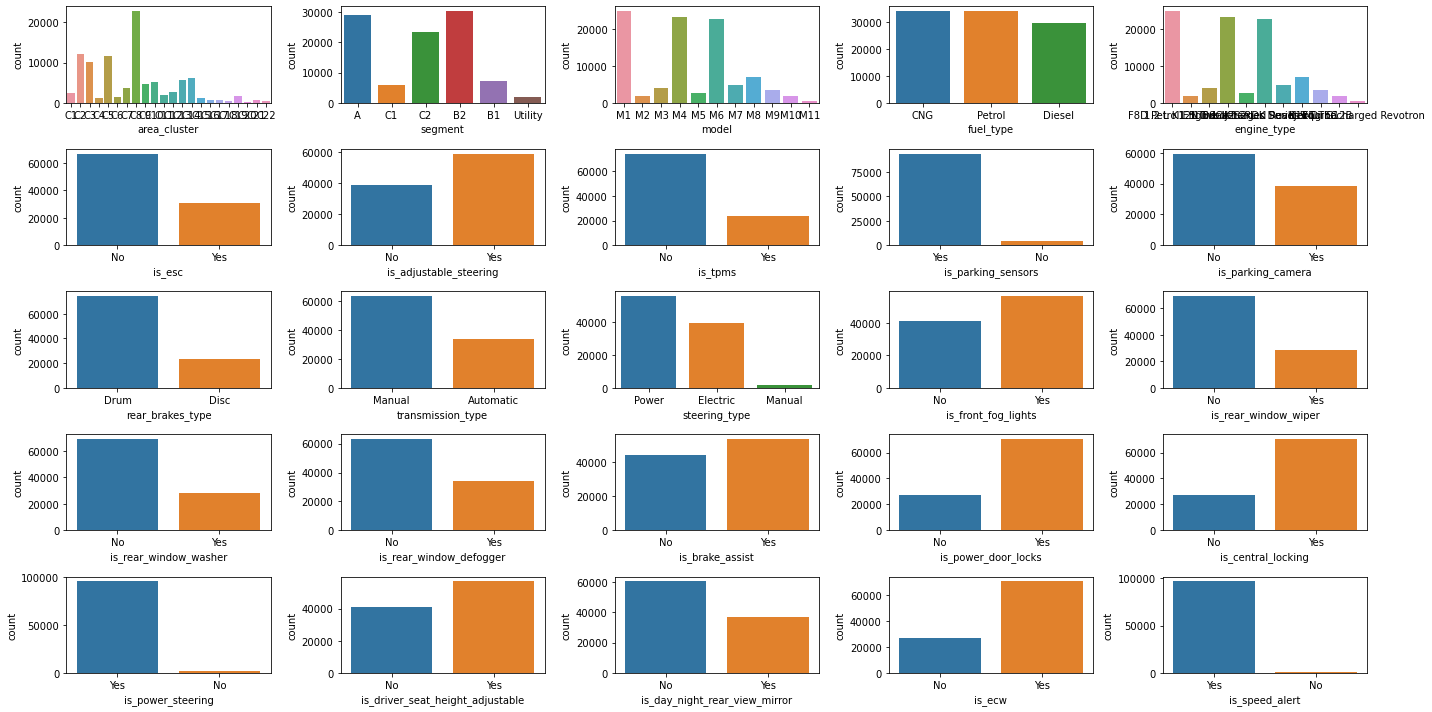

In [19]:
#Ploting all the categorical columns :-

nrows = 5
ncols = 5
repeater = 1

plt.figure(figsize = (20, 10))
for i in cat_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(combined.loc[:, i])
    repeater+=1
plt.tight_layout()
plt.show()

## Inferences
* Most of the cars are of model M1, M4, M6.
* Most of the cars have fuel type CNG or Petrol.
* Most of the cars have drum breaks.
* Most of the cars have manual transmission.

# Bivariate Analysis

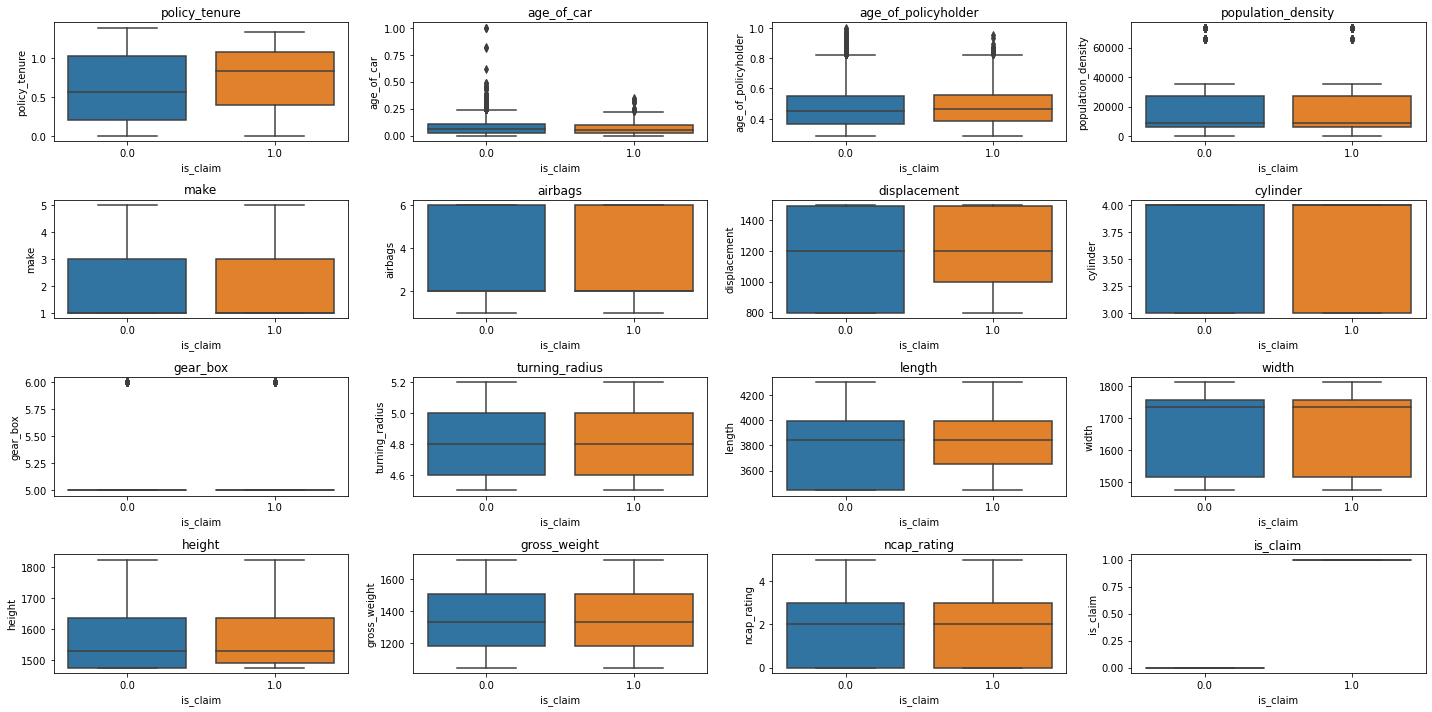

In [20]:
# Numerical vs Numerical(Target) columns  :-

nrows = 4
ncols = 4
iterator = 1

plt.figure(figsize = (20, 10))

for i in num_cols:
        plt.subplot(nrows, ncols,iterator)
        sns.boxplot(combined.is_claim, combined.loc[:,i])
        plt.title(i)
        iterator = iterator +1
                
plt.tight_layout()
plt.show()

#### We are not getting much of inferences here so we will perform statistical tests

In [21]:
# Apply the Statistical Test

# **Two sample Independent T test**
# Ho : That the features have no effect on target or vice versa

# Ha : That the features have effect on target or vice versa

imp_feats = []
import scipy.stats as stats

for i in num_cols:
    zero = combined.loc[combined.is_claim== 0, i]
    one = combined.loc[combined.is_claim== 1, i]
    teststats, pvalue = stats.ttest_ind(zero, one, alternative = 'two-sided')
    
    if pvalue < 0.5:
        imp_feats.append(i)
        
print(imp_feats)        
    
    

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'airbags', 'displacement', 'cylinder', 'length', 'width', 'gross_weight', 'ncap_rating', 'is_claim']


# Inferences
#### Our pvalue < alpha ... Then we reject our Ho 
#### our features that have effect on target are :- 
*  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'airbags', 'displacement', 'cylinder', 'length', 'width', 'gross_weight', 'ncap_rating', 'is_claim']

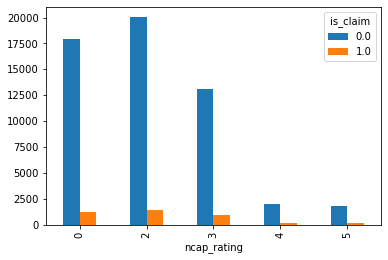

In [22]:
# Ncap rating vs target
# (as Ncap rating is categorical)

pd.crosstab(combined.ncap_rating, combined.is_claim).plot(kind='bar')
plt.show()


## Infernce

* We can infer that the cars that have the lowest ncap rating are more prone to the claims.

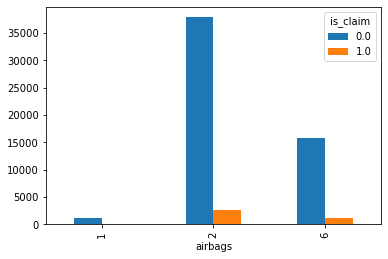

In [23]:
# Airbags vs target
#(as air bags is categorical)

pd.crosstab(combined.airbags, combined.is_claim).plot(kind='bar')
plt.show()

In [24]:
pd.crosstab(combined.airbags, combined.is_claim)

is_claim,0.0,1.0
airbags,,
1,1136,73
2,37852,2573
6,15856,1102


## Inference
* cars having 2 airbags have higher claims then cars with 6 airbags

In [25]:
# categoical vs Numerical(Target) columns  :-

# Apply the Statistical Test

# **chi_square test**
# Ho : That the features have no effect on target or vice versa

# Ha : That the features have effect on target or vice versa


cat_feats = []
for i in cat_vars:
    tbl = pd.crosstab(combined.loc[:,i], combined.is_claim)
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    if pvalue<0.05:
        cat_feats.append(i)

print(cat_feats)        

['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


# Inferences
#### Our pvalue < alpha ... Then we reject our Ho 
#### our features that have effect on target are :- 
*  ['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']

## Checking for Missing values

In [26]:
combined.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

## Inference
* There are no missing values in our train dataset

# Feature Engineering

In [27]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [28]:
# Max_torque

combined[['Nm_torque', 'rpm_torque']] = combined.max_torque.str.split('@',expand=True)

In [29]:
combined[['Nm_torque', 'rpm_torque']]

,Nm_torque,rpm_torque
0,60Nm,3500rpm
1,60Nm,3500rpm
2,60Nm,3500rpm
3,113Nm,4400rpm
4,91Nm,4250rpm
...,...,...
97650,113Nm,4400rpm
97651,250Nm,2750rpm
97652,113Nm,4400rpm
97653,113Nm,4400rpm


In [30]:
# max_power

combined[['hp', 'rpm_power']] = combined.max_power.str.split('@',expand=True)

In [31]:
combined[['hp', 'rpm_power']]

,hp,rpm_power
0,40.36bhp,6000rpm
1,40.36bhp,6000rpm
2,40.36bhp,6000rpm
3,88.50bhp,6000rpm
4,67.06bhp,5500rpm
...,...,...
97650,88.50bhp,6000rpm
97651,113.45bhp,4000rpm
97652,88.50bhp,6000rpm
97653,88.50bhp,6000rpm


In [32]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


## We have created 4 new columns 

In [33]:
# Getting digits seperately

combined['rpm_torque'] = combined.rpm_torque.apply(lambda x : float(x[:-3]))
combined['rpm_power'] = combined.rpm_power.apply(lambda x : float(x[:-3]))
combined['hp'] = combined.hp.apply(lambda x : float(x[:-3]))
combined['Nm_torque'] = combined.Nm_torque.apply(lambda x : float(x[:-2]))

In [34]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0


In [35]:
# Making categorical columns with 'yes' and 'No' categories to 0 and 1

for i in cat_vars:
    if i.startswith('is') & (i!='is_claim'):      # .startswith will select columns starting with whatever we want.
        mapp = {'Yes':1, 'No':0}
        combined[i] = combined[i].map(mapp)
        
        

In [36]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0


## Making other new features :-

In [37]:
# Per Unit Torque =

combined['per_unit_torque'] = combined.rpm_torque/combined.Nm_torque
combined['per_unit_power'] = combined.rpm_power/combined.hp

In [38]:
# finding age proportion

combined['age_prop'] = combined.age_of_car/combined.age_of_policyholder
combined['age_prop'].head()

0    0.077612
1    0.053333
2    0.052000
3    0.254222
4    0.173333
Name: age_prop, dtype: float64

In [39]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333


In [40]:
# Count of policy ID using area_cluster

combined['magic1'] = combined.groupby('area_cluster')['policy_id'].transform('nunique')

In [41]:
zero = combined.loc[combined.is_claim==0, 'magic1']
one = combined.loc[combined.is_claim==1, 'magic1']

stats.ttest_ind(zero, one)

# Pvalue <alpha : reject Ho
# This variable is useful

Ttest_indResult(statistic=-4.251501393229284, pvalue=2.1267052931968418e-05)

In [42]:
# Count of policies in Magic1/ pop_density

combined['magic2'] = combined.magic1/combined.population_density

In [43]:
zero = combined.loc[combined.is_claim==0, 'magic2']
one = combined.loc[combined.is_claim==1, 'magic2']

stats.ttest_ind(zero, one)

# Pvalue <alpha : reject Ho
# This variable is useful

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [44]:
# Finding the summary statistics of policy tenure using  area_cluster

combined['magic3'] = combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4'] = combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5'] = combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6'] = combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [45]:
list_feats = ['magic3', 'magic4', 'magic5', 'magic6']

for i in list_feats:
    zero = combined.loc[combined.is_claim==0, i]
    one = combined.loc[combined.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    print('Pvalue:', i, pvalue)
    
    
    
# Ho : That the features have no effect on target or vice versa

# Ha : That the features have effect on target or vice versa

# Except magic4 all other have pvalue< alpha, so we reject there Ho, so they have effect on our target
# In magic4, pvalue > alpha, so here we accept Ho , so magic4 has no effect on target

Pvalue: magic3 0.01517380140799255
Pvalue: magic4 0.1896759377985605
Pvalue: magic5 2.5550496912611606e-07
Pvalue: magic6 2.463473664106657e-07


In [46]:
display(combined.head(2))
combined.shape

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


(97655, 57)

In [47]:
# Encoding following columns 

# area, segment, model, fuel_type, engine, rear brakes, tranismission, steering

In [48]:
# 1. encoding this according to its weightage with claims (manual as more weightage so we will give it 1)

combined.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [49]:
combined['transmission_type'] = np.where(combined.transmission_type=='Manual', 1, 0)

In [50]:
# 2. encoding this according to its weightage with claims (manual as more weightage so we will give it 1)

combined['rear_brakes_type'] = np.where(combined.rear_brakes_type == 'Drum', 1, 0)

In [51]:
combined['rear_brakes_type'].value_counts()

1    74272
0    23383
Name: rear_brakes_type, dtype: int64

In [52]:
# Dropping unnecessary columns :-


In [53]:
combined.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Nm_torque',
       'rpm_torque', 'hp', 'rpm_power', 'per_unit_torque', 'per_unit_power',
       'age_prop', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5',

In [54]:
combined.drop(['policy_id', 'max_torque', 'max_power', 'magic4'], axis =1 , inplace = True)

In [55]:
# split data in train and test 

newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [56]:
train.shape, newtrain.shape, newtest.shape, test.shape

((58592, 44), (58592, 53), (39063, 53), (39063, 43))

In [57]:
# Drop the target variable from train and test both

x = newtrain.drop('is_claim', axis =1)
newtest = newtest.drop('is_claim', axis =1)
y = newtrain.is_claim

In [58]:
# Encoding

In [59]:
# !pip install category_encoders

In [60]:
# 3. rest of the categories we will do TargetEncoding

mycols = ['area_cluster', 'steering_type', 'engine_type', 'model', 'fuel_type', 'segment']

import category_encoders as ce

tgt = ce.TargetEncoder(cols = mycols)

In [61]:
newx = tgt.fit_transform(x, y)
test_encoded = tgt.transform(newtest)

In [62]:
# Making one more new feature 'per_unit_vol'

newx['per_unit_vol'] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [63]:
newx.shape, test_encoded.shape

((58592, 53), (39063, 53))

# Scaling

In [64]:
scale = ['policy_tenure', 'population_density', 'displacement', 'length', 'width', 'height', 'gross_weight', 'Nm_torque',
        'rpm_torque', 'hp', 'rpm_power', 'per_unit_torque', 'per_unit_power', 'magic1', 'magic3', 'magic5', 'magic6']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in scale:
    newx.loc[:, i] = sc.fit_transform(pd.DataFrame(newx.loc[:, i]))
    test_encoded.loc[:, i] = sc.transform(pd.DataFrame(test_encoded.loc[:, i]))

## Building Machine Learning Models

### Model 1

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy')

pred = rf.fit(newx, y).predict(test_encoded)

In [68]:
submission['is_claim'] = pred

In [71]:
submission.to_csv('Myfirstmodel.csv', index =False)
# After submitting this we get our f1-score 0.037

#### checking all models to see which one is giving the best score and then chossing those algorithm for our final model

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [97]:
# Define the base models

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['rf'] = RandomForestClassifier(criterion = 'entropy')
    models['ada'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models['catboost'] = CatBoostClassifier()
    models['naivebayes'] = GaussianNB()
    return models

In [100]:
# Evaluation Function (checking evaluation score) ...

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    score = cross_val_score(model, smoteex, smotey, scoring = 'f1', cv = cv, error_score = 'raise', n_jobs = -1)
    return score
    
    

In [104]:
# Build the Models...

models = base_models()
result, names = list(), list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

lg 0.589 (0.004)
rf 0.748 (0.159)
ada 0.738 (0.130)
gbm 0.776 (0.130)
xgb 0.813 (0.138)
lgbm 0.836 (0.136)
catboost 0.853 (0.133)
naivebayes 0.822 (0.150)


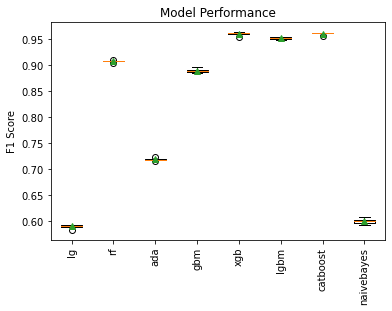

In [106]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel('F1 Score')
plt.title('Model Performance')
plt.show()

## Inference 
* We can see that xgb , lgbm, catboost are our best models

In [110]:
# Final models - xgb, lgbm, catboost

base = [('xgb', XGBClassifier()), ('lgbm', LGBMClassifier())]

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = base, final_estimator = CatBoostClassifier(), cv = cv)

In [111]:
pred_stack = stack.fit(smotex, smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5274629	total: 172ms	remaining: 2m 51s
1:	learn: 0.4049457	total: 201ms	remaining: 1m 40s
2:	learn: 0.3525299	total: 229ms	remaining: 1m 16s
3:	learn: 0.2962713	total: 258ms	remaining: 1m 4s
4:	learn: 0.2555946	total: 285ms	remaining: 56.7s
5:	learn: 0.2258674	total: 312ms	remaining: 51.6s
6:	learn: 0.2042781	total: 335ms	remaining: 47.5s
7:	learn: 0.1903002	total: 359ms	remaining: 44.5s
8:	learn: 0.1790095	total: 383ms	remaining: 42.2s
9:	learn: 0.1694901	total: 407ms	remaining: 40.3s
10:	learn: 0.1625232	total: 433ms	remaining: 38.9s
11:	learn: 0.1563696	total: 461ms	remaining: 37.9s
12:	learn: 0.1515133	total: 485ms	remaining: 36.8s
13:	learn: 0.1477532	total: 509ms	remaining: 35.8s
14:	learn: 0.1444574	total: 531ms	remaining: 34.8s
15:	learn: 0.1417186	total: 553ms	remaining: 34s
16:	learn: 0.1394039	total: 578ms	remaining: 33.4s
17:	learn: 0.1377114	total: 603ms	remaining: 32.9s
18:	learn: 0.1362694	total: 630ms	remaining: 32.5s
19:	learn:

168:	learn: 0.1265512	total: 4.19s	remaining: 20.6s
169:	learn: 0.1265513	total: 4.21s	remaining: 20.6s
170:	learn: 0.1265361	total: 4.24s	remaining: 20.5s
171:	learn: 0.1265226	total: 4.26s	remaining: 20.5s
172:	learn: 0.1265046	total: 4.29s	remaining: 20.5s
173:	learn: 0.1264912	total: 4.32s	remaining: 20.5s
174:	learn: 0.1264810	total: 4.34s	remaining: 20.5s
175:	learn: 0.1264775	total: 4.37s	remaining: 20.5s
176:	learn: 0.1264634	total: 4.4s	remaining: 20.4s
177:	learn: 0.1264496	total: 4.42s	remaining: 20.4s
178:	learn: 0.1264328	total: 4.45s	remaining: 20.4s
179:	learn: 0.1264256	total: 4.47s	remaining: 20.4s
180:	learn: 0.1264122	total: 4.5s	remaining: 20.4s
181:	learn: 0.1264028	total: 4.52s	remaining: 20.3s
182:	learn: 0.1263887	total: 4.55s	remaining: 20.3s
183:	learn: 0.1263777	total: 4.57s	remaining: 20.3s
184:	learn: 0.1263680	total: 4.59s	remaining: 20.2s
185:	learn: 0.1263516	total: 4.61s	remaining: 20.2s
186:	learn: 0.1263438	total: 4.64s	remaining: 20.2s
187:	learn: 0.

329:	learn: 0.1248470	total: 8.07s	remaining: 16.4s
330:	learn: 0.1248468	total: 8.09s	remaining: 16.4s
331:	learn: 0.1248423	total: 8.12s	remaining: 16.3s
332:	learn: 0.1248306	total: 8.15s	remaining: 16.3s
333:	learn: 0.1248205	total: 8.17s	remaining: 16.3s
334:	learn: 0.1248080	total: 8.2s	remaining: 16.3s
335:	learn: 0.1247975	total: 8.22s	remaining: 16.3s
336:	learn: 0.1247876	total: 8.26s	remaining: 16.2s
337:	learn: 0.1247787	total: 8.28s	remaining: 16.2s
338:	learn: 0.1247660	total: 8.31s	remaining: 16.2s
339:	learn: 0.1247532	total: 8.34s	remaining: 16.2s
340:	learn: 0.1247409	total: 8.36s	remaining: 16.1s
341:	learn: 0.1247301	total: 8.38s	remaining: 16.1s
342:	learn: 0.1247189	total: 8.41s	remaining: 16.1s
343:	learn: 0.1247118	total: 8.43s	remaining: 16.1s
344:	learn: 0.1246981	total: 8.46s	remaining: 16.1s
345:	learn: 0.1246829	total: 8.48s	remaining: 16s
346:	learn: 0.1246722	total: 8.5s	remaining: 16s
347:	learn: 0.1246617	total: 8.53s	remaining: 16s
348:	learn: 0.124650

491:	learn: 0.1235066	total: 12.1s	remaining: 12.5s
492:	learn: 0.1234999	total: 12.1s	remaining: 12.5s
493:	learn: 0.1234935	total: 12.2s	remaining: 12.5s
494:	learn: 0.1234904	total: 12.2s	remaining: 12.4s
495:	learn: 0.1234823	total: 12.2s	remaining: 12.4s
496:	learn: 0.1234804	total: 12.2s	remaining: 12.4s
497:	learn: 0.1234760	total: 12.3s	remaining: 12.4s
498:	learn: 0.1234654	total: 12.3s	remaining: 12.3s
499:	learn: 0.1234596	total: 12.3s	remaining: 12.3s
500:	learn: 0.1234518	total: 12.3s	remaining: 12.3s
501:	learn: 0.1234488	total: 12.4s	remaining: 12.3s
502:	learn: 0.1234422	total: 12.4s	remaining: 12.2s
503:	learn: 0.1234338	total: 12.4s	remaining: 12.2s
504:	learn: 0.1234254	total: 12.4s	remaining: 12.2s
505:	learn: 0.1234085	total: 12.5s	remaining: 12.2s
506:	learn: 0.1234030	total: 12.5s	remaining: 12.1s
507:	learn: 0.1233918	total: 12.5s	remaining: 12.1s
508:	learn: 0.1233816	total: 12.5s	remaining: 12.1s
509:	learn: 0.1233762	total: 12.6s	remaining: 12.1s
510:	learn: 

656:	learn: 0.1223568	total: 16.2s	remaining: 8.43s
657:	learn: 0.1223517	total: 16.2s	remaining: 8.41s
658:	learn: 0.1223466	total: 16.2s	remaining: 8.38s
659:	learn: 0.1223427	total: 16.2s	remaining: 8.36s
660:	learn: 0.1223336	total: 16.2s	remaining: 8.33s
661:	learn: 0.1223261	total: 16.3s	remaining: 8.3s
662:	learn: 0.1223167	total: 16.3s	remaining: 8.28s
663:	learn: 0.1223093	total: 16.3s	remaining: 8.25s
664:	learn: 0.1223044	total: 16.3s	remaining: 8.22s
665:	learn: 0.1222956	total: 16.3s	remaining: 8.2s
666:	learn: 0.1222791	total: 16.4s	remaining: 8.17s
667:	learn: 0.1222662	total: 16.4s	remaining: 8.15s
668:	learn: 0.1222636	total: 16.4s	remaining: 8.12s
669:	learn: 0.1222551	total: 16.4s	remaining: 8.1s
670:	learn: 0.1222446	total: 16.5s	remaining: 8.07s
671:	learn: 0.1222332	total: 16.5s	remaining: 8.04s
672:	learn: 0.1222308	total: 16.5s	remaining: 8.02s
673:	learn: 0.1222166	total: 16.5s	remaining: 7.99s
674:	learn: 0.1222114	total: 16.5s	remaining: 7.96s
675:	learn: 0.1

820:	learn: 0.1212961	total: 20s	remaining: 4.36s
821:	learn: 0.1212960	total: 20s	remaining: 4.33s
822:	learn: 0.1212960	total: 20s	remaining: 4.31s
823:	learn: 0.1212899	total: 20.1s	remaining: 4.28s
824:	learn: 0.1212881	total: 20.1s	remaining: 4.26s
825:	learn: 0.1212823	total: 20.1s	remaining: 4.24s
826:	learn: 0.1212773	total: 20.1s	remaining: 4.21s
827:	learn: 0.1212713	total: 20.1s	remaining: 4.18s
828:	learn: 0.1212651	total: 20.2s	remaining: 4.16s
829:	learn: 0.1212623	total: 20.2s	remaining: 4.14s
830:	learn: 0.1212581	total: 20.2s	remaining: 4.11s
831:	learn: 0.1212540	total: 20.3s	remaining: 4.09s
832:	learn: 0.1212470	total: 20.3s	remaining: 4.06s
833:	learn: 0.1212356	total: 20.3s	remaining: 4.04s
834:	learn: 0.1212284	total: 20.3s	remaining: 4.02s
835:	learn: 0.1212236	total: 20.3s	remaining: 3.99s
836:	learn: 0.1212126	total: 20.4s	remaining: 3.96s
837:	learn: 0.1212044	total: 20.4s	remaining: 3.94s
838:	learn: 0.1212016	total: 20.4s	remaining: 3.92s
839:	learn: 0.1211

983:	learn: 0.1204564	total: 23.8s	remaining: 386ms
984:	learn: 0.1204546	total: 23.8s	remaining: 362ms
985:	learn: 0.1204514	total: 23.8s	remaining: 338ms
986:	learn: 0.1204448	total: 23.8s	remaining: 314ms
987:	learn: 0.1204423	total: 23.9s	remaining: 290ms
988:	learn: 0.1204358	total: 23.9s	remaining: 266ms
989:	learn: 0.1204295	total: 23.9s	remaining: 241ms
990:	learn: 0.1204267	total: 23.9s	remaining: 217ms
991:	learn: 0.1204200	total: 23.9s	remaining: 193ms
992:	learn: 0.1204133	total: 24s	remaining: 169ms
993:	learn: 0.1204094	total: 24s	remaining: 145ms
994:	learn: 0.1204042	total: 24s	remaining: 121ms
995:	learn: 0.1204042	total: 24s	remaining: 96.5ms
996:	learn: 0.1203985	total: 24.1s	remaining: 72.4ms
997:	learn: 0.1203924	total: 24.1s	remaining: 48.3ms
998:	learn: 0.1203866	total: 24.1s	remaining: 24.1ms
999:	learn: 0.1203757	total: 24.1s	remaining: 0us


In [112]:
submission['is_claim'] = pred

In [113]:
submission.to_csv('Myfinalmodel.csv', index =False)

# After submitting this we get our f1-score 0.0371
# Our score did'nt get better with stacking 